In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
data=pd.read_csv('Country-data.csv')

In [3]:
data.reset_index(drop=True, inplace=True)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [5]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

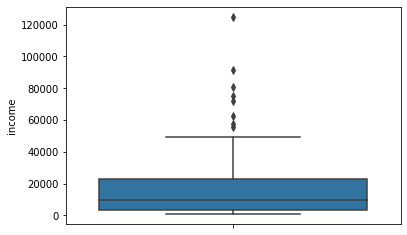

In [6]:
#we can see the outliers in the income
sns.boxplot(y=data['income'])

In [7]:
# We will use IQR method to remove Outliers from the income column
Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data.income >= Q1 - 1.5*IQR) & (data.income <= Q3 + 1.5*IQR)]

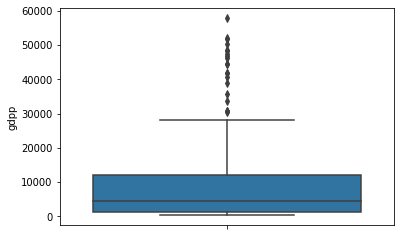

In [8]:
#we can see the outliers in the gdpp
sns.boxplot(y=data['gdpp'])

In [9]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [24]:
# We will use IQR method to remove Outliers from the gdpp column
Q1 = data['gdpp'].quantile(0.25)
Q3 = data['gdpp'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data.gdpp >= Q1 - 1.5*IQR) & (data.gdpp <= Q3 + 1.5*IQR)]

In [25]:
X=data.copy()
data_new=data.copy()

In [26]:
data_new.reset_index(drop=True, inplace=True)


In [27]:
X.pop('country')

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
24                           Bulgaria
25                       Burkina Faso
26                            Burundi
27                           Cambodia
28                           Cameroon
30                         Cape Verde
31           Central African Republic
32                               Chad
33          

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
x = scaler.fit_transform(X)

### Applying PCA on the data

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(0.9)

In [33]:
data_pca = pca.fit_transform(x)

In [34]:
data_pca.shape

(129, 5)

# Kmeans clustering


In [35]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.3292233104523211
For n_clusters=3, the silhouette score is 0.2408558284100802
For n_clusters=4, the silhouette score is 0.2237758765239923
For n_clusters=5, the silhouette score is 0.2201789211463845
For n_clusters=6, the silhouette score is 0.2431744842625328
For n_clusters=7, the silhouette score is 0.232371143025893
For n_clusters=8, the silhouette score is 0.21270017882672138


In [36]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
data_new['cluster_km'] = kmeans.labels_

# analysis 

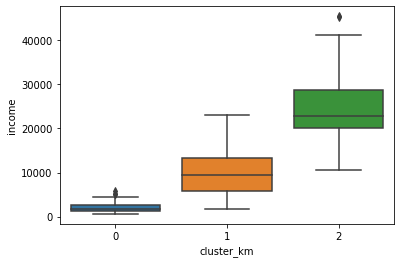

In [207]:

sns.boxplot(x='cluster_km', y='income', data=data_new)

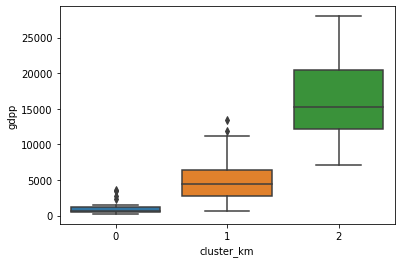

In [208]:
sns.boxplot(x='cluster_km', y='gdpp', data=data_new)

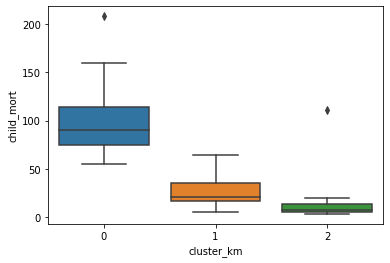

In [209]:
sns.boxplot(x='cluster_km', y='child_mort', data=data_new)

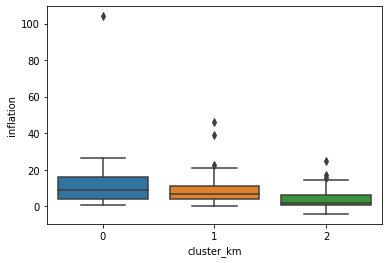

In [210]:
sns.boxplot(x='cluster_km', y='inflation', data=data_new)

In [211]:
df = pd.DataFrame(data_pca, columns=["PC1", "PC2","PC3","PC4","PC5"])
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.891142,0.489926,-0.487576,0.640189,-0.376386
1,0.893912,-0.291932,-0.976377,-0.717758,0.504851
2,0.406457,-1.380933,0.454775,-0.608578,0.474876
3,-2.324917,0.066872,2.703234,0.099493,-0.294655
4,2.126164,0.081076,-0.038482,-0.228242,-0.357589


In [212]:
df=df[['PC1','PC2']]


In [213]:
y=data_new['cluster_km']

In [214]:
df_final = pd.concat([df, y], axis=1)

C:\Users\Sim\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


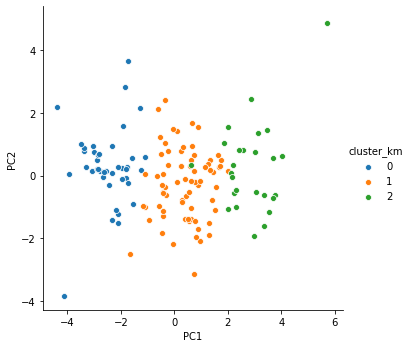

In [215]:
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_km", size=5)

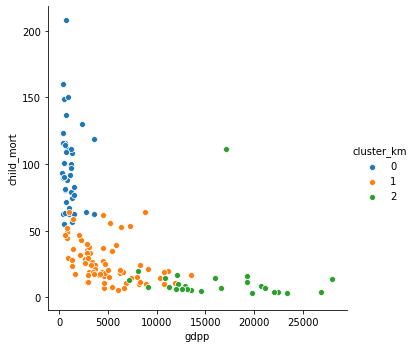

In [216]:
sns.pairplot(data=data_new, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_km", size=5)

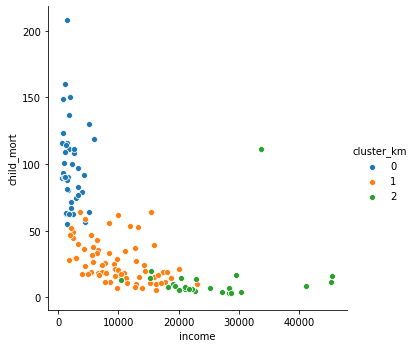

In [217]:
sns.pairplot(data=data_new, x_vars=["income"], y_vars=["child_mort"], hue = "cluster_km", size=5)

# Hierarchical clustering


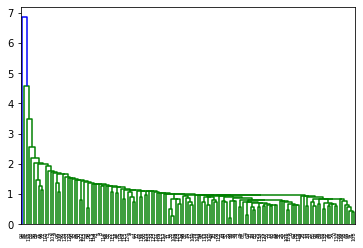

In [218]:
# single linkage
mergings = linkage(data_pca, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

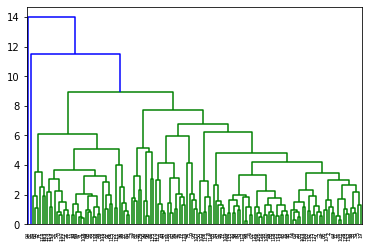

In [219]:
# complete linkage
mergings = linkage(data_pca, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [220]:
#by looking at the dendogram we can see that n cluster=6 will be adequate
#as the data set provided in small thats why hierachical may not give optimal results
cluster_labels = cut_tree(mergings, n_clusters=6).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 3, 2,
       3, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 3, 0, 3, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 3, 0, 1, 1, 0, 0, 3, 3, 1, 0, 0, 3, 3, 0, 4, 2, 1, 0, 1, 2, 1,
       1, 0, 2, 0, 1, 0, 5, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 0, 1,
       3, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 0, 0, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 3, 0, 0])

In [221]:
data_new['cluster_h'] = cluster_labels
data_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km,cluster_h
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,1


In [222]:
y2=data_new['cluster_h']

In [223]:
df_final2 = pd.concat([df, y2], axis=1)


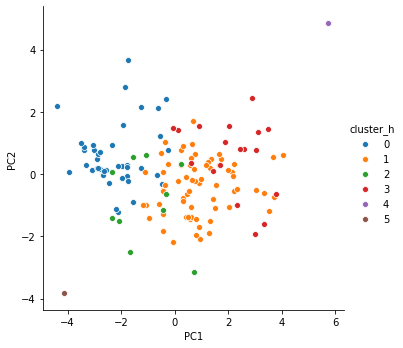

In [224]:
sns.pairplot(data=df_final2, x_vars=["PC1"], y_vars=["PC2"], hue = 'cluster_h', size=5)

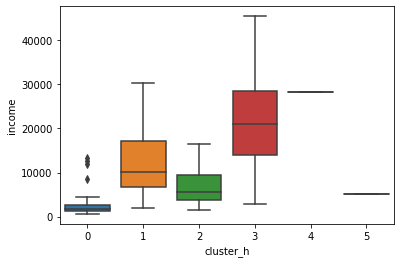

In [225]:
sns.boxplot(x='cluster_h', y='income', data=data_new)

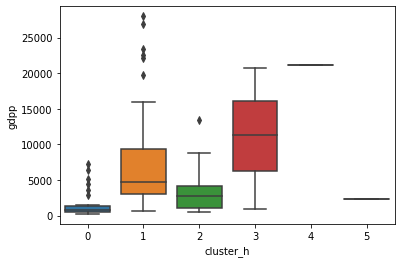

In [226]:
sns.boxplot(x='cluster_h', y='gdpp', data=data_new)

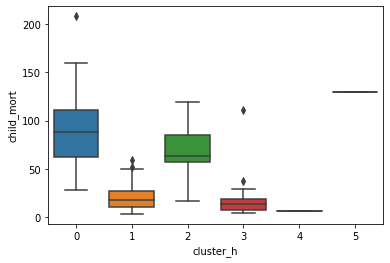

In [227]:
sns.boxplot(x='cluster_h', y='child_mort', data=data_new)

C:\Users\Sim\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


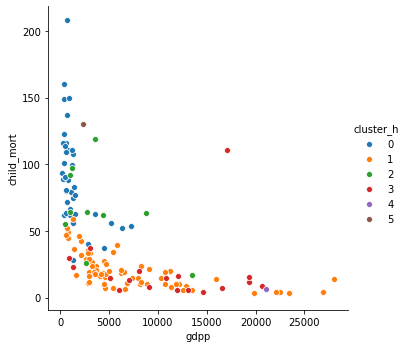

In [228]:
sns.pairplot(data=data_new, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_h", size=5)

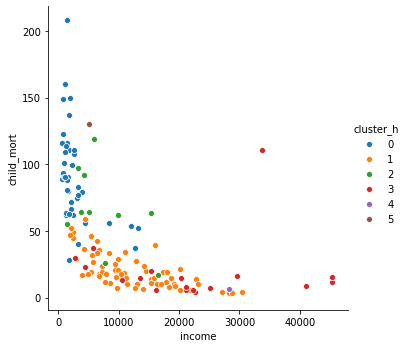

In [229]:
sns.pairplot(data=data_new, x_vars=["income"], y_vars=["child_mort"], hue = "cluster_h", size=5)

# REsults


In [230]:
# as the data set provided to us is small so i think kmeans clustering is giving optimal results

In [231]:
res=data_new[data_new.cluster_km==1]

In [232]:
res

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km,cluster_h
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,1,1
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,1,1
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,1,1
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,1,1
7,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,1,1
10,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,1,1
12,Belarus,5.5,51.400,5.61,64.5000,16200,15.100,70.4,1.49,6030,1,3
13,Belize,18.8,58.200,5.20,57.5000,7880,1.140,71.4,2.71,4340,1,1
15,Bhutan,42.7,42.500,5.20,70.7000,6420,5.990,72.1,2.38,2180,1,1
16,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,1,1


In [233]:
res=res.sort_values(by=['gdpp','income'])

In [234]:
res = res.sort_values(by=['child_mort'],ascending = False)

In [235]:
res.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km,cluster_h
90,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,1,2
46,Gabon,63.7,57.700,3.50,18.9000,15400,16.60,62.9,4.08,8750,1,2
129,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440,1,2
58,India,58.8,22.600,4.05,27.1000,4410,8.98,66.2,2.60,1350,1,1
91,Namibia,56.0,47.800,6.78,60.7000,8460,3.56,58.6,3.60,5190,1,0
